### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

- The independent variable is the word-color congruence/incongruence, or whether the ink and text are matching colors. 

- The dependent variable is the response time taken to state the color of the text by the participant.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

- We would use a two-tailed paired t-test to compare the two different hypotheses. 
- This is because we are comparing the reaction time of two sample groups from a population in two differenct conditions. 
- The sample size is less than 30.
- Null Hypothesis: There is no significant difference in reaction time of the two tests. ($\mu_d$ = difference in reaction time)
$$\mu_d = 0$$
- Alternative Hypotheis: There is a significant difference in the reaction time of the two tests. 
$$\mu_d \neq 0$$

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [3]:
## Import the packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read dataset
df = pd.read_csv('stroopdata.csv')

# inspect dataset
df.tail()

,Congruent,Incongruent
19,12.369,34.288
20,12.944,23.894
21,14.233,17.960
22,19.710,22.058
23,16.004,21.157


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [4]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [5]:
# determine median
df.median()

Congruent      14.3565
Incongruent    21.0175
dtype: float64

In [6]:
# determine variance
df.var()

Congruent      12.669029
Incongruent    23.011757
dtype: float64

In [7]:
# determine standard deviation
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

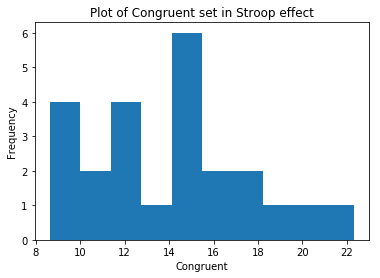

In [8]:
# visualization of Congruent set
plt.hist(df['Congruent'])
plt.xlabel('Congruent')
plt.ylabel('Frequency')
plt.title('Plot of Congruent set in Stroop effect');

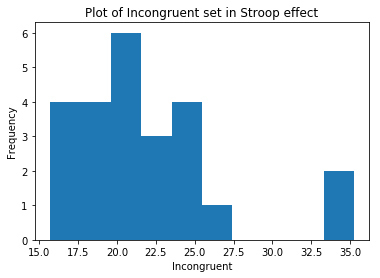

In [9]:
# visualization of Incongruent set
plt.hist(df['Incongruent'])
plt.xlabel('Incongruent')
plt.ylabel('Frequency')
plt.title('Plot of Incongruent set in Stroop effect');

- We can see by the difference in median and mean that there is a significant difference between the two reaction times. 
- We can also see a longer range of time difference in incongruent test samples compared to congruent test samples. 
- Congruent tasks appear to be consistently completed faster than incongruent tasks. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [7]:
# calculate sample size
N = df.shape[0]
print("Sample size is {}".format(N))

Sample size is 24


In [9]:
# Congruent experiment values
a = df['Congruent']
# Incongruent experiment values
b = df['Incongruent']

In [10]:
# to calculate the standard deviation, we have to calculate the variance first.
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

print(var_a, var_b)

12.6690290707 23.0117570362


In [11]:
# calculate the standard deviation
s = np.sqrt((var_a + var_b)/2)
print("Standard Deviation is {}".format(s))

Standard Deviation is 4.223788945182042


In [12]:
# calculate the mean for Congruent and Incongruent sets
a_mean = a.mean()
b_mean = b.mean()
print("Mean for Congruent and Incongruent response times are {} and {}".format(round(a_mean,4), round(b_mean,4)))

Mean for Congruent and Incongruent response times are 14.0511 and 22.0159


In [14]:
# mean difference in response time
mean_diff = a_mean - b_mean
print(round(mean_diff,4))

-7.9648


In [16]:
diff = a - b
sq_dev_from_mean = (diff - mean_diff)**2
sq_dev_from_mean

0       0.586437
1      36.177719
2      13.580760
3       0.824086
4       0.028631
5       0.455906
6       3.668023
7       0.195548
8      11.534231
9      14.724168
10     33.278957
11     21.333236
12     30.556481
13     20.828194
14     82.631888
15      4.256829
16      1.744491
17      3.331385
18      3.548671
19    194.719930
20      8.911469
21     17.958878
22     31.548349
23      7.906172
dtype: float64

In [17]:
std_dev_sq = sum(sq_dev_from_mean)/(N-1)
std_dev_sq

23.666540867753632

In [18]:
#calculate standard deviation for sample
sample_std_dev = math.sqrt(std_dev_sq)
sample_std_dev

4.864826910359056

In [20]:
# calculate t-value
t = (mean_diff/sample_std_dev)*(math.sqrt(N))
t


-8.020706944109957

- Alpha values are 0.05 (95% confidence interval), hence we have 0.025 in each tail.
- With N-1 degrees of freedom (24-1=23), we get t-critical value of +2.069 and -2.069.
- Since our t-value of -8.021 is beyond the t-critical value, we can reject the Null Hypothesis.
- We can conclude that the response time is longer with incongruent words compared to congruent words. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

- When we first see the words, we will process the word itself first before the color and identify it in that order. When the brain has an image association between the words and colors that do not match, it will take longer for it to full process the incongruent words. 
- Another example can be of numbers presented in different font sizes, asking participants to identify the larger number. This can also be an example of the Stroot Effect as the brain image association will differ. 